# Car Price Prediction Using Multiple Linear Regression

### Introduction

In this project, I will use a dataset contraining Vehicle Sales Data to predict the selling prices of vehicles based on different attributes. I will explore, analyze and visualize the data and also create a multiple linear regression model for the purpose of predicting car prices.

The dataset includes the following attributes for each car:
- year: manufacturing year
- make: brand/manufacturer
- model: specific model
- trim: additional designation for the vehicle model
- body type
- transmission type
- VIN: Vehicle Identification Number (unique for each vehicle)
- state: state of registration
- condition: rating
- odometer: mileage
- color: exterior color
- interior: interior color
- seller: seller information
- mmr: Manheim Market Report values
- selling price
- sale date

Data Source: Kaggle (https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/code)

### Importing the libraries

In [38]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

### Loading the data

In [2]:
df = pd.read_csv('car_prices.csv')

### Investigating the data

In [3]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


We notice here that there are several null values in our dataset, which we will count below.

In [5]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [6]:
df.sellingprice.describe()

count    558825.000000
mean      13611.358810
std        9749.501628
min           1.000000
25%        6900.000000
50%       12100.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64

In [7]:
len(df[df.sellingprice <= 500 ])

7069

In [8]:
df.make.value_counts()

Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: make, Length: 96, dtype: int64

In [9]:
df.body.value_counts()

Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
                ...  
cab plus 4          1
g37 coupe           1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: body, Length: 87, dtype: int64

In [10]:
df.transmission.value_counts()

automatic    475915
manual        17544
sedan            15
Sedan            11
Name: transmission, dtype: int64

### Visualizing the data

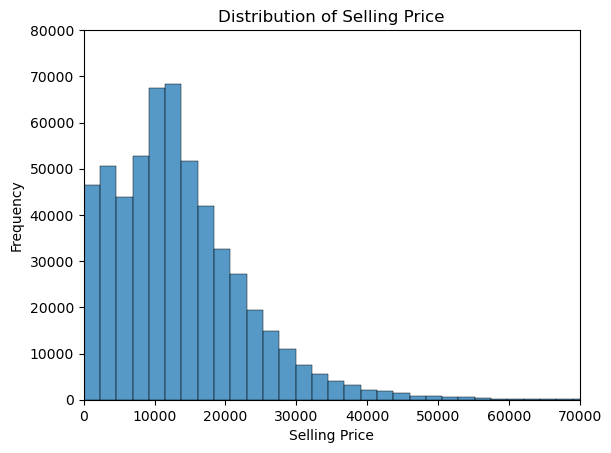

<Figure size 640x480 with 0 Axes>

In [11]:
sns.histplot(df.sellingprice, bins=100)
plt.axis([0, 70000, 0, 80000])
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()
plt.clf()

In the figure above, we notice that the distribution of the selling price of cars is right-skewed, as most observations are concentrated in the left hand side of the graph, with some less-frequent, higher values on the right side. 

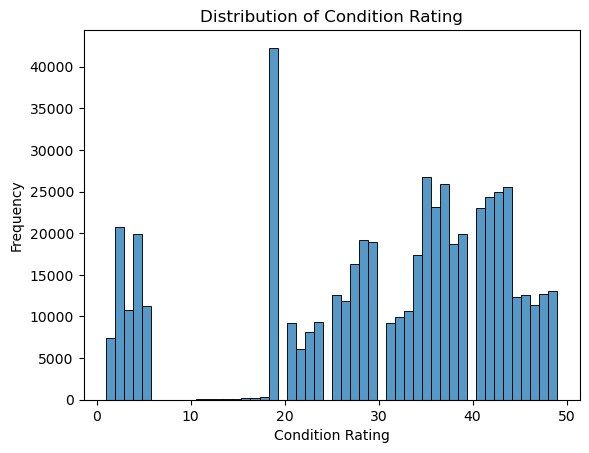

<Figure size 640x480 with 0 Axes>

In [12]:
sns.histplot(df.condition, bins=50)
plt.title('Distribution of Condition Rating')
plt.xlabel('Condition Rating')
plt.ylabel('Frequency')
plt.show()
plt.clf()

The distribution of the condition rating reveals that the rating of each car is stated on a different scale, for which these is no indication in the datatape. Hence, I will not be using this feature as a predictor of price

### Cleaning the data

##### Primary feature selection

In [13]:
df = df.drop(columns=['trim', 'body', 'vin', 'condition', 'color', 'interior', 'seller'])

Here, I drop the columns that I do not find relevant or efficient for predicting the selling price of cars. 

##### Remove records with null values

In [14]:
df = df.dropna()
len(df)

484757

##### Remove records with selling price < 500 as unrealistic values

In [15]:
df = df[df.sellingprice>=500]
len(df)

480565

Any records with a selling price below 500 are deemed unrealistic and are, hence, removed to avoid analyzing problematic data.

##### Comparing the sale year to the manufacturing year to deduce the 'age' of the car

In [16]:
df.saledate = pd.to_datetime(df.saledate, utc=True)

In [17]:
df['saleyear'] = df.saledate.dt.year

In [18]:
df['yearbuild_sold'] = df.saleyear - df.year

In [19]:
df.yearbuild_sold.unique()

array([-1,  1,  0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 19, 18, 17, 20, 25, 22, 21, 23, 24, 28, 29, 31, 26])

Here, we notice some instances where the calculated age of some vehicles is -1, due to the vehicle being shown as sold in December, while the manufacturing year is that of the following year. I will adjust this below:

In [20]:
df.yearbuild_sold = df.yearbuild_sold.where(df.yearbuild_sold != -1, 0)
df.yearbuild_sold.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       19, 18, 17, 20, 25, 22, 21, 23, 24, 28, 29, 31, 26])

##### Clean 'make' variable

In [21]:
df.make = df.make.str.upper()

In [22]:
df.make = np.where((df.make == "MERCEDES") | (df.make == "MERCEDES-B"), "MERCEDES-BENZ", df.make)

In [23]:
df.make = np.where(df.make == "LANDROVER", "LAND ROVER", df.make)

In [24]:
df.make = np.where(df.make == "VW", "VOLKSWAGEN", df.make)

In [25]:
df.make = np.where(df.make.str.contains(" TK"), df.make.str[:-3], df.make)

In [26]:
df.make = np.where(df.make.str.contains(" TRUCK"), df.make.str[:-6], df.make)

In [27]:
df.make.nunique()

56

Reduced the number of unique values in the 'make' variable from 96 to 56 by cleaning the data. This will significantly increase the effiiciency of my linear regression model, as I will need to encode the make variable in order to use it in my regression model. Thus, cleaning this column reduces the number of variables I will input into my regression model by 40 variables, which significantly saves up on computing power and time. 

### Splitting the data

##### Splitting into independent and dependent variables

In [28]:
X = df[['make', 'transmission', 'odometer', 'yearbuild_sold', 'mmr']]

In [29]:
y = df.sellingprice

##### One-hot encoding the categorical variables

In [30]:
X = pd.get_dummies(data=X, columns=['make', 'transmission'], drop_first=True)

##### Splitting into training and test sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

### Creating multiple linear regression model and fitting it to the training data

In [32]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

### Evaluating the model

In [41]:
y_pred = mlr.predict(X_test)

##### R-squared

In [33]:
mlr.score(X_test, y_test)

0.9626969647736272

##### Mean Absolute Error

In [45]:
mae = mean_absolute_error(y_test, y_pred)
mae

1090.6338789186036

##### Mean Squared Error

In [43]:
mse = mean_squared_error(y_test, y_pred)
mse

3450572.2132268464

##### Regression Coefficients

In [34]:
predictors = X.columns

In [35]:
coefficients = pd.Series(mlr.coef_, predictors).sort_values()

In [36]:
coefficients.head(10)

make_FISKER        -2744.364488
make_PLYMOUTH      -2238.489360
make_TESLA         -1586.862861
make_FERRARI       -1301.417619
make_ROLLS-ROYCE    -604.382419
make_MASERATI       -510.363114
make_DOT            -486.836177
make_JAGUAR         -394.495871
make_OLDSMOBILE     -275.833977
make_DAEWOO         -268.722674
dtype: float64

In [37]:
len(coefficients)

59

### Conclusion

The accuracy of the model is very high, at 96.3%, making this an effective model at predicting the selling prices of cars based on their make, transmission, mileage, age, and mmr. This figure could be further improved by including more independent variables in the model. However, that would increase the processing time significantly, as the remaining features are categorical variables with many classes each. 